In [17]:
# !pip list|grep scipy

In [18]:
import math
import os
import os.path as osp
import json
from datetime import datetime
from pprint import pprint
from matplotlib.pyplot import imread
# from cv2 import imresize
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)

In [19]:
def is_ascii(s):
    return all(ord(c) < 128 for c in s)

### VIST directory

In [20]:
annotations_dir = '/root/xhong/VIST/data/'
images_dir = '/root/xhong/VIST/images'

In [21]:
split = 'test'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_test = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_test = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

dii's [test] loaded. It took 0.16 seconds.
sis's [test] loaded. It took 0.13 seconds.


In [22]:
split = 'train'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_train = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_train = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))


split = 'val'
# Load dii's split json
b = datetime.now()
path_to_dii_val = osp.join(annotations_dir, 'dii', split+'.description-in-isolation.json')
dii_val = json.load(open(path_to_dii_val))
print ('dii\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

# Load sis's split json
b = datetime.now()
path_to_sis_val = osp.join(annotations_dir, 'sis', split+'.story-in-sequence.json')
sis_val = json.load(open(path_to_sis_val))
print ('sis\'s [%s] loaded. It took %.2f seconds.' % (split, (datetime.now() - b).total_seconds()))

dii's [train] loaded. It took 2.02 seconds.
sis's [train] loaded. It took 2.95 seconds.
dii's [val] loaded. It took 0.21 seconds.
sis's [val] loaded. It took 0.23 seconds.


In [23]:
# Let's check one ann
sis_test.keys()

dict_keys(['images', 'info', 'albums', 'type', 'annotations'])

In [24]:
def show_album(alb_id):
    img_ids = alb_to_img_ids[alb_id]
    plt.figure()
    cols = 5
    rows = math.ceil(len(img_ids)/float(cols))
    for i, img_id in enumerate(img_ids):
        img = Images[img_id]
        img_file = osp.join(images_dir, split, img['id']+'.jpg')
        img_content = imread(img_file)
#         img_content = imresize(img_content, (224, 224))
        ax = plt.subplot(rows, cols, i+1)
        ax.imshow(img_content)
        ax.axis('off')
        ax.set_title(str(img_id)+'\n'+img['datetaken'][4:])
        #print(img['url_o'])
    plt.show()

In [25]:
def show_story(story_id, show_image=True):
    sent_ids = story_to_sent_ids[story_id]
    if show_image:
        plt.figure()
        for i, sent_id in enumerate(sent_ids):
            img_id = Sents[sent_id]['img_id']
            img = Images[img_id]
            img_file = osp.join(images_dir, split, str(img_id)+'.jpg')
            img_content = imread(img_file)
#             img_content = imresize(img_content, (224, 224))
            ax = plt.subplot(1, len(sent_ids), i+1)
            ax.imshow(img_content)
            ax.axis('off')
            ax.set_title(str(img_id)+'\n'+img['datetaken'][5:])
            #print(img['url_o'])
        plt.show()
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        print ('%s \t %s \n %s' % (img_id, sent['original_text'], img['url_o']))

In [26]:
def print_story(story_id, Sents, show_image=True):
    sent_ids = story_to_sent_ids[story_id]
    print ('\n<story_id=' + story_id + '>')
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        sent_st = '%s \n %s \n' % (img_id, sent['original_text'])
        print (sent_st)
#         print '%s \n %s \n %s' % (img_id, sent['original_text'], img['url_o'])

In [27]:
def get_stories(story_id, Sents, show_image=True):
    result = ''
    sent_ids = story_to_sent_ids[story_id]
    result += '\nstory_id=' + story_id + '\n'
    for sent_id in sent_ids:
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        sent_st = '%s \n%s \n' % (img_id, sent['original_text'])
        result += sent_st
    if not is_ascii(result):
        print ('non ascii !')
        return ''
    return result

In [28]:
SPLIT = 'all'

In [29]:
if SPLIT == 'train':
    all_imgs = sis_train['images']
    all_albums = sis_train['albums']
    all_annotations = sis_train['annotations']
elif SPLIT == 'val':
    all_imgs = sis_val['images']
    all_albums = sis_val['albums']
    all_annotations = sis_val['annotations']
elif SPLIT == 'test':
    all_imgs = sis_test['images']
    all_albums = sis_test['albums']
    all_annotations = sis_test['annotations']
else: 
    all_imgs = sis_test['images'] + sis_train['images'] + sis_val['images']
    all_albums = sis_test['albums'] + sis_train['albums'] + sis_val['albums']
    all_annotations = sis_test['annotations'] + sis_train['annotations'] + sis_val['annotations']

In [30]:
all_imgs[0]

{'datetaken': '2004-11-27 10:40:46',
 'license': '1',
 'title': 'The venue.',
 'text': '',
 'album_id': '44277',
 'longitude': '-0.212688',
 'url_o': 'https://farm1.staticflickr.com/2/1741642_81837e8e9e_o.jpg',
 'secret': '81837e8e9e',
 'media': 'photo',
 'latitude': '51.920449',
 'id': '1741642',
 'tags': 'stevenage fairies craftfair xmas 2004'}

In [31]:
Images = {item['id']: item for item in all_imgs}
Albums = {item['id']: item for item in all_albums}

alb_to_img_ids = {}
for item in all_imgs:
    alb_id = item['album_id']
    img_id = item['id']
    alb_to_img_ids[alb_id] = alb_to_img_ids.get(alb_id, []) + [img_id]

# sort img_ids based on datetime
def getDateTime(img_id):
    x = Images[img_id]['datetaken']
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
# for alb_id, img_ids in alb_to_img_ids.items():
#     img_ids.sort(key=getDateTime)

In [32]:
# make sents = [{}]
sents = []
for ann in all_annotations:
    sent = ann[0].copy()
    sent['id'] = sent.pop('storylet_id')
    sent['order'] = sent.pop('worker_arranged_photo_order')
    sent['img_id'] = sent.pop('photo_flickr_id')
    sents += [sent]
Sents = {sent['id']: sent for sent in sents}

# story_id -> sent_ids
story_to_sent_ids = {}
for sent_id, sent in Sents.items():
    story_id = sent['story_id']
    story_to_sent_ids[story_id] = story_to_sent_ids.get(story_id, []) + [sent_id]

def get_order(sent_id):
    return Sents[sent_id]['order']
for story_id, sent_ids in story_to_sent_ids.items():
    sent_ids.sort(key=get_order)
    
# alb_id -> story_ids
alb_to_story_ids = {}
for story_id, sent_ids in story_to_sent_ids.items():
    sent = Sents[sent_ids[0]]
    alb_id = sent['album_id']
    alb_to_story_ids[alb_id] = alb_to_story_ids.get(alb_id, []) + [story_id]

In [41]:
# alb_id = '72157594542419706'
# show_album(alb_id)

In [40]:
# story_ids = alb_to_story_ids[alb_id]
# print ('This album has %s stories.' % len(story_ids))
# for i in range(5):
#     print('Story', i)
#     show_story(story_ids[i], True)

In [35]:
len(all_albums)

10040

In [36]:
story_idInt_list = [40893, 41865, 40471, 40507, 44515, 45278, 42076, 45100, 42104, 41920, 42102, 41313, 42762, 45258, 45179, 
          44156, 41769, 41773, 40574, 44769, 43118, 40943, 43658]
story_id_list = [str(x) for x in story_idInt_list]

In [47]:
imageID_set = set()
for story_id in story_id_list:
    sent_ids = story_to_sent_ids[story_id]
    full_caption = []
    for i, sent_id in enumerate(sent_ids):
        img_id = Sents[sent_id]['img_id']
        imageID_set.add(img_id)
    print ('Story: ', story_id)
    for sent_pos, sent_id in enumerate(sent_ids):
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        print ('%s: %s' % (sent_pos, sent['original_text']))

Story:  40893
0: Once while I was n vacation in this nice brick hotel.
1: I woke up and took my dog Trixie for a walk.
2: Trixie ran around and enjoyed the fresh air.
3: We had lots of fun playing fetch together.
4: After a while she got tired and had to take a rest.
Story:  41865
0: The team of scientists headed to the Mojave Desert today.
1: They were there to study local rock formations.
2: Some traveled on foot, while others preferred to ride camelback. 
3: Finally they got to their destination, the oldest rock crevice known to man!
4: After many long hours of research, the team determined this crevice was once home to an indigenous tribe of natives. It was an exciting day for science! 
Story:  40471
0: We gathered up some fire works to set off at dark.
1: We grilled some burgers that were oddly shaped.
2: Our friends trickled in one by one!
3: We got all the food on the grill to cook and ready to eat.
4: The sunset was amazing that night! 
Story:  40507
0: My little niece came to 

In [46]:
len(imageID_set)

110

In [51]:
# copy img files to example

# from shutil import copyfile
# for image_ID in imageID_set: 
#     src = osp.join(images_dir, 'all', image_ID+'.jpg')
#     dst = osp.join(images_dir, 'example', image_ID+'.jpg')
#     copyfile(src, dst)

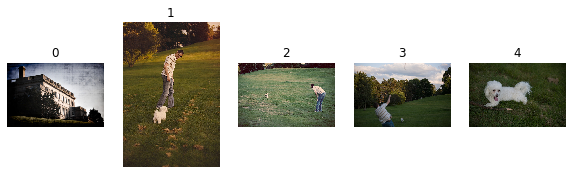

Automatic captions: 
0: a large building with a clock on it.
1: a man throwing a frisbee in a field.
2: a man standing on top of a lush green field.
3: a person flying a kite in a field.
4: a white dog with a frisbee in its mouth.
Story: 
0: Once while I was n vacation in this nice brick hotel.
1: I woke up and took my dog Trixie for a walk.
2: Trixie ran around and enjoyed the fresh air.
3: We had lots of fun playing fetch together.
4: After a while she got tired and had to take a rest.


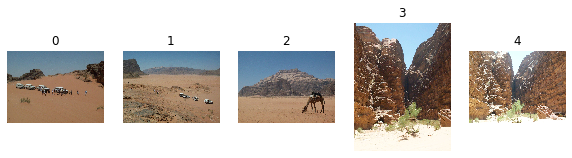

Automatic captions: 
0: a group of people standing on top of a beach.
1: a herd of sheep standing on top of a dirt field.
2: a couple of horses standing on top of a dirt field.
3: a group of snow covered mountains in the snow.
4: a mountain with a tree in the background.
Story: 
0: The team of scientists headed to the Mojave Desert today.
1: They were there to study local rock formations.
2: Some traveled on foot, while others preferred to ride camelback. 
3: Finally they got to their destination, the oldest rock crevice known to man!
4: After many long hours of research, the team determined this crevice was once home to an indigenous tribe of natives. It was an exciting day for science! 


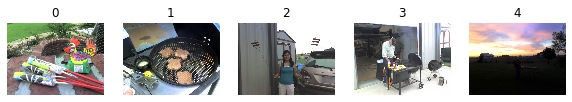

Automatic captions: 
0: a toy toy car is parked on the ground.
1: a pan of food on a stove top.
2: a woman standing in front of a bus.
3: a man is cooking food in a kitchen.
4: a woman standing on a beach with a kite.
Story: 
0: We gathered up some fire works to set off at dark.
1: We grilled some burgers that were oddly shaped.
2: Our friends trickled in one by one!
3: We got all the food on the grill to cook and ready to eat.
4: The sunset was amazing that night! 


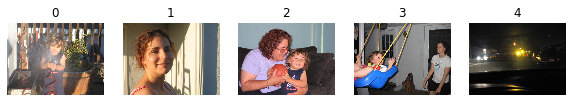

Automatic captions: 
0: a woman sitting in a room with a laptop.
1: a young girl is looking at the camera.
2: a young boy sitting on a couch holding a remote.
3: a group of people playing a video game.
4: a city street at night with traffic lights.
Story: 
0: My little niece came to visit last week.
1: Her mom was looking good as she always does.
2: I had a blast playing ball with her.
3: When we put her in the indoor swing she became very excited.
4: The road was gloomy as they headed back home.


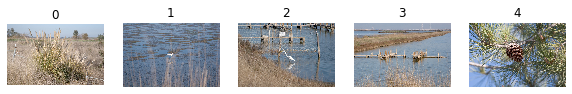

Automatic captions: 
0: a lone zebra standing in a field of grass.
1: a couple of birds standing in the water.
2: a bird standing in the water next to a body of water.
3: a group of boats that are in the water.
4: a bird is perched on a tree branch.
Story: 
0: This is our annual trip to the lake. It looks quite dry and barron.
1: This is the actual lake. The water is quite low right now.
2: We see a variety of different wildlife. Lots of different ducks and swans.
3: This is a long walkway that litterly goes almost across the lake.
4: Here we have acorns on the trees. Its getting to be autumn.


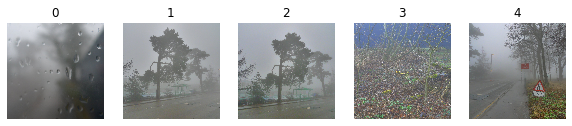

Automatic captions: 
0: a close up of a person flying a kite.
1: a person standing on the side of a road.
2: a person standing on the side of a road.
3: a tree that is sitting in the woods.
4: a stop sign on the side of a road.
Story: 
0: The storm came in out of nowhere. 
1: The trees were blowing and rain was pouring down. 
2: I couldn't believe how bad it was raining there. 
3: It caused so much damage during the rain. 
4: I could hardly see down to the end of the street. 


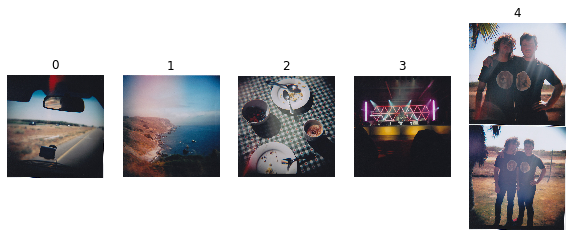

Automatic captions: 
0: a laptop computer sitting on top of a desk.
1: a view of a mountain range with mountains in the background.
2: a plate of food on a table.
3: a person is sitting on a bench at night.
4: a group of people standing next to each other.
Story: 
0: My best friend, Bernie, and I loved to go on long road trips. 
1: We would wander by automobile up and down the coast. 
2: Some interesting foods were discovered on our adventures. 
3: There were also excellent concert stops. 
4: I will remember Bernie for the rest of my drive on the road of life. 


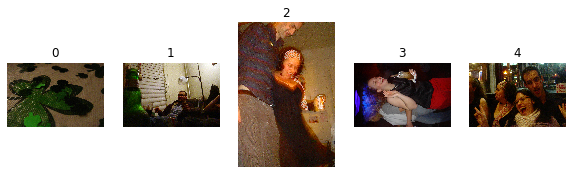

Automatic captions: 
0: a group of people sitting on a couch.
1: a man sitting on a couch with a laptop.
2: a man standing in front of a refrigerator.
3: a woman is holding a white teddy bear.
4: a couple of people sitting at a table.
Story: 
0: For me St. Patrick's day is for partying and having a good time. 
1: Green beer seems to always show up on this day.
2: That girl needed some help on the steps. 
3: I think some of the guests was having a better time than they should. 
4: Seeing this girl shows me what they mean by being a party animal. 


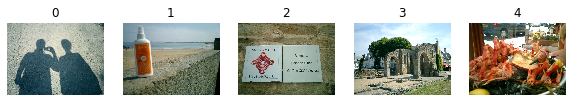

Automatic captions: 
0: a close up of a person holding a skateboard.
1: a red fire hydrant sitting on the beach.
2: a sign that has a sign on it.
3: a large building with a clock on it.
4: a person is cutting a piece of pizza.
Story: 
0: Today my husband and I visited the ruins at Athens.
1: We made sure to pack plenty of sunscreen because we were both fair skinned.
2: We saw several historic monuments.
3: The ruins were fascinating.
4: For lunch, we enjoyed fresh seafood at the shore.


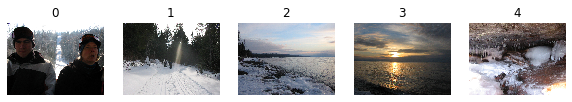

Automatic captions: 
0: a man and a woman sitting on a snowy hill.
1: a person riding skis down a snow covered slope.
2: a view of a beach with mountains in the background.
3: a person on a beach with a kite.
4: a white polar bear standing in the water.
Story: 
0: They were ready to go trek through the snow.
1: They never knew where the paths would lead them.
2: They finally met the waters edge.
3: It looked like it stretched on so far in the distance.
4: Deep in the caves you could still see the snow.


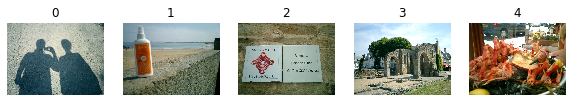

Automatic captions: 
0: a close up of a person holding a skateboard.
1: a red fire hydrant sitting on the beach.
2: a sign that has a sign on it.
3: a large building with a clock on it.
4: a person is cutting a piece of pizza.
Story: 
0: It's time to go to the Russian Museum.
1: We had to stop to get ear wax removal first.
2: Here's the placard and...
3: ...what's left of the museum.
4: We said screw it and went for dinner.


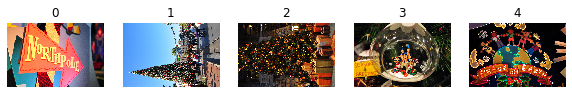

Automatic captions: 
0: a red stop sign with a sign on it.
1: a group of people walking down a street.
2: a christmas tree in front of a christmas tree.
3: a close up of a plate of food.
4: a blue and white fire hydrant on a street.
Story: 
0: The Northpole has become a family tradition for us.
1: Each year my sister, brother, and I bring our families. 
2: The beautifully decorated trees bring nostalgic smiles to our faces.
3: The ornaments seem become more complex each year.
4: The trip puts our families in the Christmas spirit and kick off the holiday season for us.


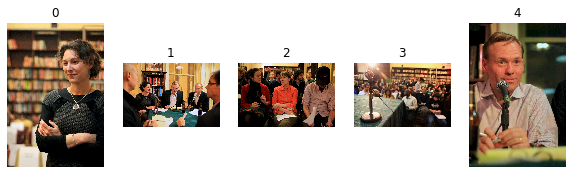

Automatic captions: 
0: a man in a black shirt and a tie.
1: a group of people sitting around a table.
2: a group of people sitting around a table.
3: a man sitting on a bench in front of a crowd.
4: a man is holding a glass of wine.
Story: 
0: I am a confident, intelligent and capable board member.
1: I am here to help steer the arts programs in my local city.
2: I go to meetings to help inform the public of events and causes we undertake.
3: Keeping the city informed on arts and culture is a fun way to give back.
4: After our presentation we often open the floor to the audience for new ideas on future projects.


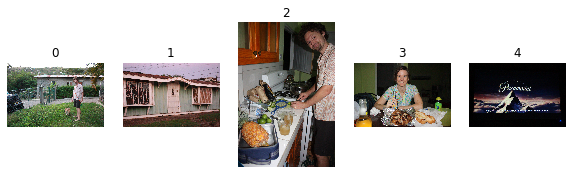

Automatic captions: 
0: a man standing in front of a fence.
1: a house that is sitting in front of a house.
2: a man is preparing food in a kitchen.
3: a woman sitting at a table with a plate of food.
4: a street sign with a sign on it.
Story: 
0: Our friends moved to a new place this past summer.
1: They moved into this little place near the coast.
2: He decided that he would welcome us by cooking us dinner.
3: It was a very nice dinner that was enjoyed by all.
4: We then settled down for the night and watched a movie.


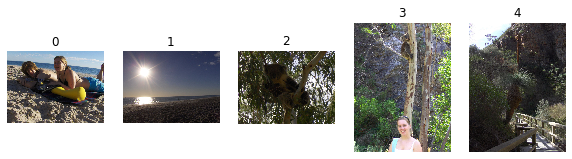

Automatic captions: 
0: a woman sitting on a beach with a surfboard.
1: a view of a beach with a beach.
2: a brown bear is sitting on a tree branch.
3: a woman standing in the woods holding a frisbee.
4: a wooden bench sitting in the middle of a forest.
Story: 
0: Today we went to the beach and laid in the sun.
1: The sun was hot, but it was a really nice day.
2: Eventually, we went for a hike and saw a koala!
3: We took photos with the koala.
4: We found a wooden bridge and stopped for a photo.


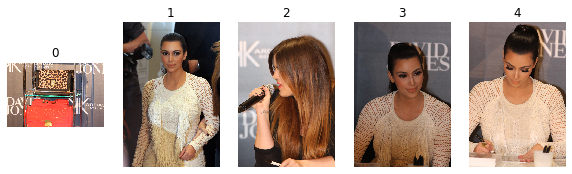

Automatic captions: 
0: a red suitcase sitting on top of a wooden floor.
1: a woman is holding a wii remote control.
2: a young girl is holding a cell phone.
3: a woman with glasses is holding a cell phone.
4: a young boy sitting at a table with a laptop.
Story: 
0: The Kardashians held a big press conference to announce new purses being added under their brand. The purses are considered top of the line.
1: Kim is seen making her way to the podium table now. Lot's of photographs being taken by critics and fans alike.
2: Khole is already seated as she takes a few questions from the crowd. Everyone wants the full scoop on these purses.
3: Kim has taken her seat as she takes her first question. The Khardashians are use to all the publicity.
4: After the press conference concluded, Kim was nice enough to sign a few autographs to a few special fans.


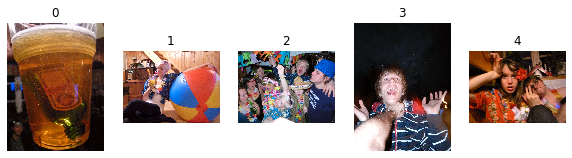

Automatic captions: 
0: a bottle of beer sitting on a table.
1: a couple of kids standing next to each other.
2: a group of people standing next to each other.
3: a man in a black shirt and a tie.
4: a couple of people that are standing in a room.
Story: 
0: It was time to party.
1: They found a huge beach ball to have at the party.
2: A good time was had by all.
3: The boys messed around with each other.
4: The girls took many pictures.


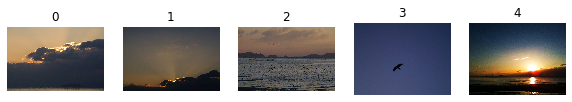

Automatic captions: 
0: a view of a mountain range with a sky background.
1: a person standing on a beach with a kite.
2: a flock of birds flying over a body of water.
3: a person flying a kite in the sky.
4: a view of a sunset at sunset at sunset.
Story: 
0: The florida sunsets are always stunning.
1: They are often covered by clouds.
2: Even the birds come to watch them.
3: They fly high in the air to see it.
4: Eventually, the sun sets completely. 


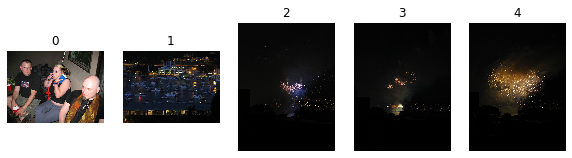

Automatic captions: 
0: a couple of people sitting on a couch.
1: a city street at night with a city street.
2: a view of a city street at night.
3: a view of a city street at night.
4: a person is standing in the rain with an umbrella.
Story: 
0: My friends and I met up for the 4th of july.
1: We went into the city to see the fireworks show. 
2: We could see some of the fireworks over the harbor. 
3: The finale was pretty intense. 
4: The final firework was pretty big. 


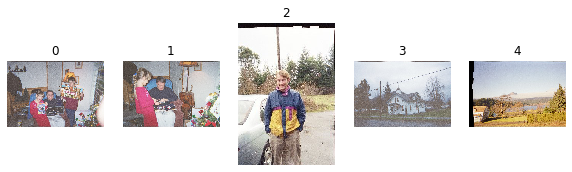

Automatic captions: 
0: a group of young children playing a video game.
1: a group of people playing a video game.
2: a man wearing a hat and a hat.
3: a large building with a clock on it.
4: a view of a field with mountains in the background.
Story: 
0: The day started at home, like any other. 
1: But then everyone started to get excited.
2: We couldn't wait to leave.
3: Hit the road and head toward the wilderness.
4: And we were all jumping for joy when we finally arrived at our destination. 


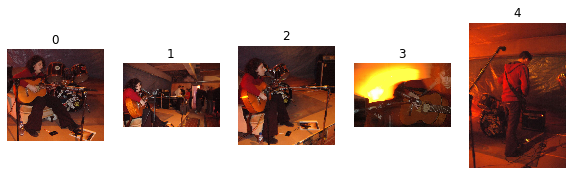

Automatic captions: 
0: a couple of people standing next to each other.
1: a group of people standing around a table.
2: a couple of people are playing a video game.
3: a person sitting at a table with a laptop.
4: a man standing in front of a suitcase.
Story: 
0: Lillian was performing at a small gathering of people. She played her guitar and sang.
1: The people did not go near her and stayed at the far end of the room. 
2: Lillian wondered was her singing bad? She decided to just play the guitar. 
3: She knew a lot of songs and played them all. 
4: When Lillian was finished, it was Chad's turn to play guitar for the crowd. 


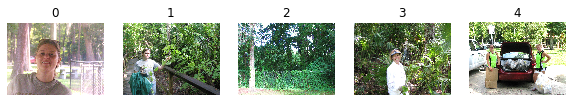

Automatic captions: 
0: a man wearing a hat and a tie.
1: a man standing in front of a forest.
2: a view of a forest with trees in the background.
3: a woman standing in the woods holding a frisbee.
4: a man sitting on a boat with a dog.
Story: 
0: We took out daughter out hiking one day.
1: She liked all of the plants and foliage.
2: The park was partly deserted, but still had the greenish charm.
3: Her mother went with us too of course. She had a lot of fun as well.
4: Another day has ended with a successful hike.


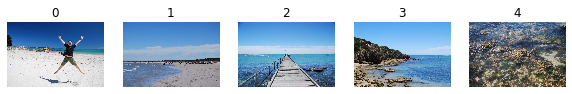

Automatic captions: 
0: a person on a beach with a frisbee.
1: a group of people standing on top of a beach.
2: a boat on a body of water next to a body of water.
3: a view of a beach with a mountain in the background.
4: a large bird is flying through the sky.
Story: 
0: We were so happy that we finally made it to the beach after a long drive.
1: The view was great and there were hardly any other people there.
2: The was a long wooden pier.
3: We took a lot of pictures.
4: I also spent some time exploring the tide pools.


In [75]:
for story_id in story_id_list:
    sent_ids = story_to_sent_ids[story_id]
    full_caption = []
    plt.figure()
    for i, sent_id in enumerate(sent_ids):
        img_id = Sents[sent_id]['img_id']
        img = Images[img_id]
        img_file = osp.join(images_dir, split, str(img_id)+'.jpg')
        img_content = imread(img_file)
    #             img_content = imresize(img_content, (224, 224))
        ax = plt.subplot(1, len(sent_ids), i+1)
        ax.imshow(img_content)
        ax.axis('off')
        ax.set_title(str(i))
        #print(img['url_o'])
        r = requests.post(
            "https://api.deepai.org/api/neuraltalk",
            files={
                'image': open(img_file, 'rb'),
            },
            headers={'api-key': '513a4a8b-69c3-471a-ba35-2d890d00e713'} 
        )
        raw_capt = r.json()['output']
        #print (raw_capt)
        auto_caption = str(i) + ': ' + raw_capt
        full_caption.append(auto_caption)
    plt.show()
    print ('Automatic captions: ')
    for capt in full_caption:
        print(capt)
    print ('Story: ')
    for sent_pos, sent_id in enumerate(sent_ids):
        sent = Sents[sent_id]
        img_id = sent['img_id']
        img = Images[img_id]
        print ('%s: %s' % (sent_pos, sent['original_text']))

In [62]:
images_dir

'/root/xhong/VIST/images'

In [63]:
img_id

'3718775593'

In [69]:
import requests
r = requests.post(
    "https://api.deepai.org/api/neuraltalk",
    files={
        'image': open(osp.join(images_dir, split, str(img_id)+'.jpg'), 'rb'),
    },
    headers={'api-key': '513a4a8b-69c3-471a-ba35-2d890d00e713'}
)

In [70]:
r.json()

{'output': 'a large building with a clock on it.',
 'id': 'fadbbf85-d04c-4743-8386-9a97218a4c7d'}